# ADA final exam

## Deadline
_Friday, January 19, 2018, at 19:15 CET_


## Important notes

* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will monitor the network for unusual activities.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Make sure you upload your iPython Notebook (1 file) with [this form](https://goo.gl/forms/JKPX74ZH707sB7Up1) at the end of the exam, with all the cells already evaluated (except for the Spark-related question 1.4).
* Complete all the fields in the form, and name your file following the format "NameSurname_sciper.ipynb". The form will be open to submissions until 19:20 (strict deadline). Late submissions will not be accepted.

# Design the Pokedex 2.0

![banner](images/dataset-cover.jpg)

Pokémon are small creatures that fight in competitions. All Pokémon have different numerical characteristics (strength of attack, defense, etc.) and belong to one or two so-called classes (water, fire, etc.).
[Professor Oak](https://www.pojo.com/cartoon/Oak.gif) is the inventor of the [Pokedex](https://en.wikipedia.org/wiki/Gameplay_of_Pok%C3%A9mon#Pok%C3%A9dex), a useful portable device that keeps information about all the Pokémon available. As his lead data scientist, you just received a request from him asking you to update the software on all Pokedex devices. In this exam, you will work toward improving the Pokedex by (1) exploring a dataset of Pokémon and the battles they fight, (2) developing a model for predicting the outcome of battles between Pokémon, and (3) devising a method for ranking Pokémon by their overall strength.

## Dataset description
Professor Oak has dumped the memory of one Pokedex device, resulting in the dataset you’ll work with in this exam.

### [pokemon.csv](pokemon.csv)

In this file, each row represents the features of one Pokémon.

* pid: Numeric - ID of the Pokémon
* HP: Numeric - Health points
* Attack: Numeric - Strength of the regular attack
* Defense: Numeric - Strength of the regular defense
* Sp. Atk: Numeric - Strength of the special attack
* Sp. Def: Numeric - Strength of the special defense
* Speed: Numeric - Moving speed
* Legendary: Boolean - ‘True’ if the Pokémon is rare
* Class 1: Categorical - Pokémon class
* Class 2: Categorical - Pokémon class

Please note that a Pokémon can have either one or two classes. If a Pokémon has two classes, they are both considered to have the same importance.

### [combats.csv](combats.csv)

In this file, each row represents the outcome of one battle between two Pokémon.

* First_pokemon: Numeric - ID (match with pid)
* Second_pokemon: Numeric - ID (match with pid)
* Winner: Numeric - ID of the winner


### Good luck!


# Questions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
sns.set_context('paper')
sns.set_style('white')
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier




## Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

### 1 (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [2]:
cb = pd.read_csv('combats.csv')
pk = pd.read_csv('pokemon.csv')

In [3]:
cb

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [4]:
pk

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [5]:
cb.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [6]:
pk.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [7]:
pk[['Name','Class 1', 'Class 2']].describe()

,Name,Class 1,Class 2
count,799,800,414
unique,799,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


<AxesSubplot: >

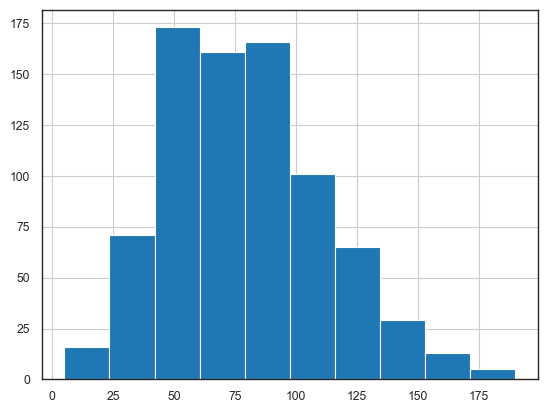

In [8]:
pk.Attack.hist()

<AxesSubplot: >

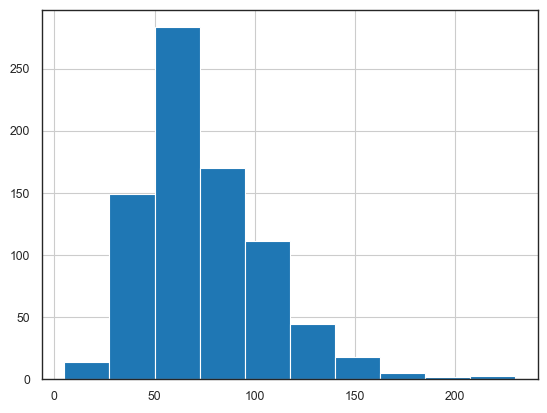

In [9]:
pk.Defense.hist()

### 2 (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;

In [10]:
pk[['Name', 'Attack', 'Defense']].set_index('Name').stack(
).reset_index().rename(columns={'level_1': 'metric', 0: 'value'})

,Name,metric,value
0,Bulbasaur,Attack,49
1,Bulbasaur,Defense,49
2,Ivysaur,Attack,62
3,Ivysaur,Defense,63
4,Venusaur,Attack,82
...,...,...,...
1595,Hoopa Confined,Defense,60
1596,Hoopa Unbound,Attack,160
1597,Hoopa Unbound,Defense,60
1598,Volcanion,Attack,110


<AxesSubplot: xlabel='value', ylabel='Count'>

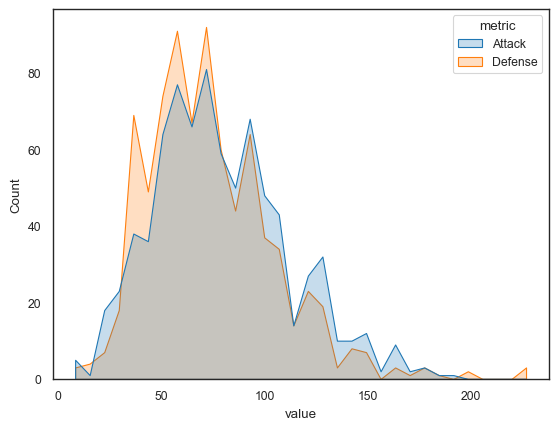

In [11]:
sns.histplot(data=pk[['Name', 'Attack', 'Defense']].set_index(
        'Name').stack().reset_index(
        ).rename(columns={'level_1': 'metric', 0: 'value'}),
    x='value',
    hue='metric',
    element="poly")

   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;

In [12]:
pk['atk_ov_def'] = pk.Attack / pk.Defense

pk.sort_values(by='atk_ov_def', ascending=False).head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,9.00
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,False,4.50
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.75


In [13]:
pk.sort_values(by='atk_ov_def').head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070


  4. list the names of the 10 Pokémon with the largest number of victories.

In [14]:
dict(zip(pk.pid,pk.Name))

{1: 'Bulbasaur',
 2: 'Ivysaur',
 3: 'Venusaur',
 4: 'Mega Venusaur',
 5: 'Charmander',
 6: 'Charmeleon',
 7: 'Charizard',
 8: 'Mega Charizard X',
 9: 'Mega Charizard Y',
 10: 'Squirtle',
 11: 'Wartortle',
 12: 'Blastoise',
 13: 'Mega Blastoise',
 14: 'Caterpie',
 15: 'Metapod',
 16: 'Butterfree',
 17: 'Weedle',
 18: 'Kakuna',
 19: 'Beedrill',
 20: 'Mega Beedrill',
 21: 'Pidgey',
 22: 'Pidgeotto',
 23: 'Pidgeot',
 24: 'Mega Pidgeot',
 25: 'Rattata',
 26: 'Raticate',
 27: 'Spearow',
 28: 'Fearow',
 29: 'Ekans',
 30: 'Arbok',
 31: 'Pikachu',
 32: 'Raichu',
 33: 'Sandshrew',
 34: 'Sandslash',
 35: 'Nidoranâ™€',
 36: 'Nidorina',
 37: 'Nidoqueen',
 38: 'Nidoranâ™‚',
 39: 'Nidorino',
 40: 'Nidoking',
 41: 'Clefairy',
 42: 'Clefable',
 43: 'Vulpix',
 44: 'Ninetales',
 45: 'Jigglypuff',
 46: 'Wigglytuff',
 47: 'Zubat',
 48: 'Golbat',
 49: 'Oddish',
 50: 'Gloom',
 51: 'Vileplume',
 52: 'Paras',
 53: 'Parasect',
 54: 'Venonat',
 55: 'Venomoth',
 56: 'Diglett',
 57: 'Dugtrio',
 58: 'Meowth',
 59: 

In [15]:
cb['Name1'] = cb['First_pokemon'].replace(dict(zip(pk.pid,pk.Name)))
cb['Name2'] = cb['Second_pokemon'].replace(dict(zip(pk.pid,pk.Name)))
cb['Name3'] = cb['Winner'].replace(dict(zip(pk.pid,pk.Name)))
cb

,First_pokemon,Second_pokemon,Winner,Name1,Name2,Name3
0,266,298,298,Larvitar,Nuzleaf,Nuzleaf
1,702,701,701,Virizion,Terrakion,Terrakion
2,191,668,668,Togetic,Beheeyem,Beheeyem
3,237,683,683,Slugma,Druddigon,Druddigon
4,151,231,151,Omastar,Shuckle,Omastar
...,...,...,...,...,...,...
49995,707,126,707,Reshiram,Horsea,Reshiram
49996,589,664,589,Drilbur,Tynamo,Drilbur
49997,303,368,368,Pelipper,Zangoose,Zangoose
49998,109,89,109,Voltorb,Magnemite,Voltorb


10 pokemons with most victories

In [16]:
cb.Name3.value_counts().head(10)

Mewtwo                152
Infernape             136
Aerodactyl            136
Jirachi               134
Slaking               133
Deoxys Speed Forme    133
Mega Absol            130
Murkrow               130
Mega Houndoom         128
Mega Rayquaza         127
Name: Name3, dtype: int64

### 3 (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

None to discard

In [17]:
pk[(pk['Class 1'] == 'Grass') & (pk['Class 2'] == 'Grass')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def


In [18]:
pk[(pk['Class 1'] == 'Rock') & (pk['Class 2'] == 'Rock')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def


In [19]:
from scipy.stats import ttest_ind

In [20]:
ttest_ind(
    pk[(pk['Class 1'] == 'Grass') | (pk['Class 2'] == 'Grass')]['Attack'],
    pk[(pk['Class 1'] == 'Rock') | (pk['Class 2'] == 'Rock')]['Attack'])

Ttest_indResult(statistic=-3.6123310718800608, pvalue=0.0004125367100834457)

### 4 (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

### 1 (3 points) Generate the feature vectors and the labels to train your model.

join tables

In [21]:
pk

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,0.666667
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,1.454545
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,1.833333
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,2.666667


In [22]:
cb

,First_pokemon,Second_pokemon,Winner,Name1,Name2,Name3
0,266,298,298,Larvitar,Nuzleaf,Nuzleaf
1,702,701,701,Virizion,Terrakion,Terrakion
2,191,668,668,Togetic,Beheeyem,Beheeyem
3,237,683,683,Slugma,Druddigon,Druddigon
4,151,231,151,Omastar,Shuckle,Omastar
...,...,...,...,...,...,...
49995,707,126,707,Reshiram,Horsea,Reshiram
49996,589,664,589,Drilbur,Tynamo,Drilbur
49997,303,368,368,Pelipper,Zangoose,Zangoose
49998,109,89,109,Voltorb,Magnemite,Voltorb


In [23]:
cb = cb.drop(['Name1','Name2','Name3'],axis = 1)

In [24]:
cb

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [25]:
cb.merge(pk, left_on='Winner', right_on='pid').Name.describe()

count      49915
unique       782
top       Mewtwo
freq         152
Name: Name, dtype: object

In [26]:
def loserr(row):
    if row['Winner'] == row['Second_pokemon']:
        return row['First_pokemon']
    else:
        return row['Second_pokemon']

cb['Loser'] = cb.apply(loserr,axis = 1)
cb

,First_pokemon,Second_pokemon,Winner,Loser
0,266,298,298,266
1,702,701,701,702
2,191,668,668,191
3,237,683,683,237
4,151,231,151,231
...,...,...,...,...
49995,707,126,707,126
49996,589,664,589,664
49997,303,368,368,303
49998,109,89,109,89


In [27]:
cb2 = cb.merge(
    pk.drop('Name',axis=1), left_on='Winner', right_on='pid', how='left').drop('pid',axis=1
    ).merge(
        pk.drop('Name',axis=1), left_on='Loser', right_on='pid', how='left', suffixes=("_Winner","_Loser")).drop('pid',axis=1
        )
cb2

,First_pokemon,Second_pokemon,Winner,Loser,Class 1_Winner,Class 2_Winner,HP_Winner,Attack_Winner,Defense_Winner,Sp. Atk_Winner,...,Class 1_Loser,Class 2_Loser,HP_Loser,Attack_Loser,Defense_Loser,Sp. Atk_Loser,Sp. Def_Loser,Speed_Loser,Legendary_Loser,atk_ov_def_Loser
0,266,298,298,266,Grass,Dark,70,70,40,60,...,Rock,Ground,50,64,50,45,50,41,False,1.280000
1,702,701,701,702,Rock,Fighting,91,129,90,72,...,Grass,Fighting,91,90,72,90,129,108,True,1.250000
2,191,668,668,191,Psychic,NaN,75,75,75,125,...,Fairy,Flying,55,40,85,80,105,40,False,0.470588
3,237,683,683,237,Dragon,NaN,77,120,90,60,...,Fire,NaN,40,40,40,70,40,20,False,1.000000
4,151,231,151,231,Rock,Water,70,60,125,115,...,Bug,Rock,20,10,230,10,230,5,False,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,126,Dragon,Fire,100,120,100,150,...,Water,NaN,30,40,70,70,25,60,False,0.571429
49996,589,664,589,664,Ground,NaN,60,85,40,30,...,Electric,NaN,35,55,40,45,40,60,False,1.375000
49997,303,368,368,303,Normal,NaN,73,115,60,60,...,Water,Flying,60,50,100,85,70,65,False,0.500000
49998,109,89,109,89,Electric,NaN,40,30,50,55,...,Electric,Steel,25,35,70,95,55,45,False,0.500000


In [28]:
X = cb2.drop(['Winner', 'First_pokemon', 'Second_pokemon', 'Loser'], axis=1)
y = cb2.Winner

In [29]:
X = pd.get_dummies(X)

In [30]:
X

,HP_Winner,Attack_Winner,Defense_Winner,Sp. Atk_Winner,Sp. Def_Winner,Speed_Winner,Legendary_Winner,atk_ov_def_Winner,HP_Loser,Attack_Loser,...,Class 2_Loser_Ghost,Class 2_Loser_Grass,Class 2_Loser_Ground,Class 2_Loser_Ice,Class 2_Loser_Normal,Class 2_Loser_Poison,Class 2_Loser_Psychic,Class 2_Loser_Rock,Class 2_Loser_Steel,Class 2_Loser_Water
0,70,70,40,60,40,60,False,1.750000,50,64,...,0,0,1,0,0,0,0,0,0,0
1,91,129,90,72,90,108,True,1.433333,91,90,...,0,0,0,0,0,0,0,0,0,0
2,75,75,75,125,95,40,False,1.000000,55,40,...,0,0,0,0,0,0,0,0,0,0
3,77,120,90,60,90,48,False,1.333333,40,40,...,0,0,0,0,0,0,0,0,0,0
4,70,60,125,115,70,55,False,0.480000,20,10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,True,1.200000,30,40,...,0,0,0,0,0,0,0,0,0,0
49996,60,85,40,30,45,68,False,2.125000,35,55,...,0,0,0,0,0,0,0,0,0,0
49997,73,115,60,60,60,90,False,1.916667,60,50,...,0,0,0,0,0,0,0,0,0,0
49998,40,30,50,55,55,100,False,0.600000,25,35,...,0,0,0,0,0,0,0,0,1,0


In [31]:
y

0        298
1        701
2        668
3        683
4        151
        ... 
49995    707
49996    589
49997    368
49998    109
49999      9
Name: Winner, Length: 50000, dtype: int64

### Normalize the values

### 2 (5 points) How does your model handle categorical features and Pokémon with multiple classes?


Just throw all the features in and make dummy variables

### 3 (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# def train_test_split_handcrafted (X,y,test_size):
#     df_train = X.sample(frac=0.9)
#     df_test = y[~df.index.isin(df_train.index)]

#     y_train = df_train["origin"]
#     X_train = df_train.drop("origin", axis=1)

#     y_test = df_test["origin"]
#     X_test = df_test.drop("origin", axis=1)

#     return X_train, X_test, y_train, y_test

In [33]:
cl = list(map(
    lambda N_est: list(map(
        lambda M_dpt: RandomForestClassifier(max_depth=M_dpt,random_state=0, n_estimators=N_est),
        [2,4,10])),
    [19,25,50,100]))
cl

[[RandomForestClassifier(max_depth=2, n_estimators=19, random_state=0),
  RandomForestClassifier(max_depth=4, n_estimators=19, random_state=0),
  RandomForestClassifier(max_depth=10, n_estimators=19, random_state=0)],
 [RandomForestClassifier(max_depth=2, n_estimators=25, random_state=0),
  RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0),
  RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)],
 [RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0),
  RandomForestClassifier(max_depth=4, n_estimators=50, random_state=0),
  RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)],
 [RandomForestClassifier(max_depth=2, random_state=0),
  RandomForestClassifier(max_depth=4, random_state=0),
  RandomForestClassifier(max_depth=10, random_state=0)]]

In [34]:
ft = list(map(
    lambda lst: list(map(
        lambda classifier: classifier.fit(X_train,y_train),
        lst)), 
    cl))
ft

[[RandomForestClassifier(max_depth=2, n_estimators=19, random_state=0),
  RandomForestClassifier(max_depth=4, n_estimators=19, random_state=0),
  RandomForestClassifier(max_depth=10, n_estimators=19, random_state=0)],
 [RandomForestClassifier(max_depth=2, n_estimators=25, random_state=0),
  RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0),
  RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)],
 [RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0),
  RandomForestClassifier(max_depth=4, n_estimators=50, random_state=0),
  RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)],
 [RandomForestClassifier(max_depth=2, random_state=0),
  RandomForestClassifier(max_depth=4, random_state=0),
  RandomForestClassifier(max_depth=10, random_state=0)]]

### 4 (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

In [35]:
pred = list(map(
    lambda lst: list(map(
        lambda fitted: fitted.predict(X_test), 
        lst)),
    ft))
pred

[[array([438, 549, 727, ..., 438, 163, 135]),
  array([438, 269, 513, ..., 438, 163, 135]),
  array([576, 269, 513, ..., 576, 793, 583])],
 [array([522, 314, 394, ..., 522, 163, 135]),
  array([682, 269, 513, ..., 682, 428, 135]),
  array([576, 269, 513, ..., 726, 793, 583])],
 [array([727, 314, 234, ..., 727, 163, 135]),
  array([522, 269, 513, ..., 682, 793, 135]),
  array([576, 269, 513, ..., 576, 793, 583])],
 [array([727, 314, 234, ..., 727, 163, 135]),
  array([727, 269, 513, ..., 727, 793, 135]),
  array([576, 269, 513, ..., 372, 793, 583])]]

In [36]:
f1scores = list(map(
    lambda lst: list(map(
        lambda prediction: f1_score(y_test, prediction, average='weighted'),
        lst)),
    pred))
f1scores

[[0.06162446102665121, 0.18193814598196106, 0.4943664737886057],
 [0.0755413216830593, 0.2052394612990899, 0.5599569055007003],
 [0.08579989172377948, 0.2538707681061509, 0.6113896415247593],
 [0.12383199210038678, 0.3017465613239076, 0.7012354735621951]]

**We can see that the accuracy increases with the number of estimators and depth!** 

The f1score for n_est = 100 and max depth = 10:

In [37]:
f1scores[3][2]

0.7012354735621951

### 5 (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

The problem is that we are using test data to train the model as well! Tuning they hyperparameter is a form of meta-training the model. We are tuning it according to the test data - or in other words we are training the hyperparameter with the test data. This is biasing our estimates of the errors on the test data. Normally, test data should be trully "test" data - not "meta-train" test data.

We would address the problem by splitting the data into a validation set as well, and then testing the error after tuning.

### 6 (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.

In [86]:
cl = list(map(
    lambda N_est: list(map(
        lambda M_dpt: RandomForestClassifier(
            max_depth=M_dpt, random_state=0, n_estimators=N_est),
        [2, 4, 10])),
    [19, 25, 50, 100]))
cl

ft = list(map(
    lambda lst: list(map(
        lambda classifier: classifier.fit(X_train, y_train),
        lst)),
    cl))
ft

pred = list(map(
    lambda lst: list(map(
        lambda fitted: fitted.predict(X_val),
        lst)),
    ft))
pred

f1scores = list(map(
    lambda lst: list(map(
        lambda prediction: f1_score(y_val, prediction, average='weighted'),
        lst)),
    pred))
f1scores


[[0.060063128884260575, 0.15722606804237943, 0.5126598684954428],
 [0.08698231758211022, 0.1906110943712753, 0.5684241482854409],
 [0.10655031511081929, 0.2547778838932211, 0.6442233056160324],
 [0.13885161294766715, 0.3098833717215982, 0.714928117064763]]

In [40]:
f1scores[3][2]

0.714928117064763

An unbiased error on an "untouched" test set:

In [41]:
f1_score(y_test, RandomForestClassifier(max_depth=10,random_state=0, n_estimators=100).fit(X_train,y_train).predict(X_test), average ='weighted')

0.7055540091909849

### 7 (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

In [42]:
fr = RandomForestClassifier(
    max_depth=10, random_state=0, n_estimators=100).fit(X_train, y_train)
importances = fr.feature_importances_


In [43]:
X_train.columns

Index(['HP_Winner', 'Attack_Winner', 'Defense_Winner', 'Sp. Atk_Winner',
       'Sp. Def_Winner', 'Speed_Winner', 'Legendary_Winner',
       'atk_ov_def_Winner', 'HP_Loser', 'Attack_Loser', 'Defense_Loser',
       'Sp. Atk_Loser', 'Sp. Def_Loser', 'Speed_Loser', 'Legendary_Loser',
       'atk_ov_def_Loser', 'Class 1_Winner_Bug', 'Class 1_Winner_Dark',
       'Class 1_Winner_Dragon', 'Class 1_Winner_Electric',
       'Class 1_Winner_Fairy', 'Class 1_Winner_Fighting',
       'Class 1_Winner_Fire', 'Class 1_Winner_Flying', 'Class 1_Winner_Ghost',
       'Class 1_Winner_Grass', 'Class 1_Winner_Ground', 'Class 1_Winner_Ice',
       'Class 1_Winner_Normal', 'Class 1_Winner_Poison',
       'Class 1_Winner_Psychic', 'Class 1_Winner_Rock', 'Class 1_Winner_Steel',
       'Class 1_Winner_Water', 'Class 2_Winner_Bug', 'Class 2_Winner_Dark',
       'Class 2_Winner_Dragon', 'Class 2_Winner_Electric',
       'Class 2_Winner_Fairy', 'Class 2_Winner_Fighting',
       'Class 2_Winner_Fire', 'Class 2_Win

<AxesSubplot: xlabel='feature'>

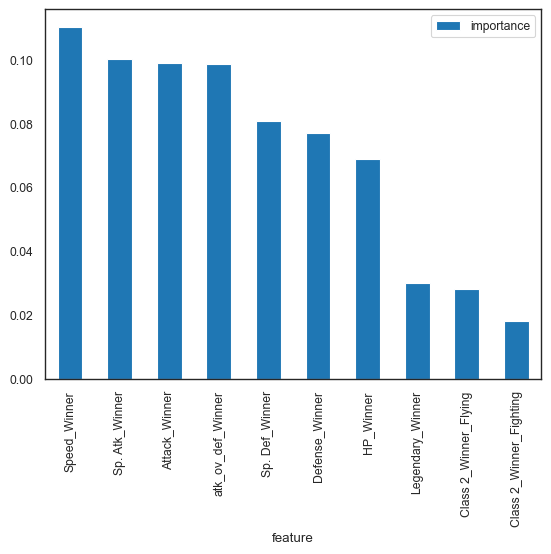

In [44]:
pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values(
    by='importance', ascending=False).head(10).set_index('feature').plot(kind='bar')


In [45]:
X_train

,HP_Winner,Attack_Winner,Defense_Winner,Sp. Atk_Winner,Sp. Def_Winner,Speed_Winner,Legendary_Winner,atk_ov_def_Winner,HP_Loser,Attack_Loser,...,Class 2_Loser_Ghost,Class 2_Loser_Grass,Class 2_Loser_Ground,Class 2_Loser_Ice,Class 2_Loser_Normal,Class 2_Loser_Poison,Class 2_Loser_Psychic,Class 2_Loser_Rock,Class 2_Loser_Steel,Class 2_Loser_Water
4607,100,100,100,100,100,100,False,1.000000,85,56,...,0,0,1,0,0,0,0,0,0,0
41938,105,180,100,180,100,115,True,1.800000,80,100,...,0,1,0,0,0,0,0,0,0,0
29249,60,100,89,55,69,112,False,1.123596,35,64,...,0,0,0,0,0,0,0,0,0,0
11201,70,80,70,80,70,110,False,1.142857,160,110,...,0,0,0,0,0,0,0,0,0,0
12582,65,95,100,60,50,50,False,0.950000,70,120,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45445,65,65,60,110,95,130,False,1.083333,75,75,...,0,0,0,0,0,0,0,0,0,0
7413,28,25,25,45,35,40,False,1.000000,75,80,...,0,0,0,0,0,0,0,0,0,0
20676,60,45,70,45,90,95,False,0.642857,70,90,...,0,0,0,0,0,0,0,0,0,0
49749,100,110,90,85,90,60,False,1.222222,70,62,...,0,0,0,0,0,0,0,0,0,0


Interaction - the relative differences between the two groups when you look at the first and the second pokemon

## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.

### 1 (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [46]:
pk

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,0.666667
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,1.454545
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,1.833333
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,2.666667


In [47]:
wins = cb.Winner.value_counts()
losses = cb.Loser.value_counts()
wl = pd.merge(wins, losses, right_index=True, left_index=True).rename(
    columns={'Winner': 'Wins', 'Loser': 'Losses'})


In [48]:
wins

163    152
438    136
154    136
428    134
314    133
      ... 
577      5
237      4
639      4
290      3
190      3
Name: Winner, Length: 783, dtype: int64

In [49]:
losses

667    138
470    136
290    135
231    135
49     134
      ... 
727      5
704      4
20       4
513      3
155      2
Name: Loser, Length: 784, dtype: int64

In [50]:
wl

,Wins,Losses
163,152,12
438,136,13
154,136,5
428,134,19
314,133,17
...,...,...
577,5,123
237,4,119
639,4,125
290,3,135


Sanity check

In [51]:
wl.loc[49]

Wins        9
Losses    134
Name: 49, dtype: int64

In [52]:
losses[49]

134

In [53]:
wins[49]

9

In [54]:
wl.reset_index()

,index,Wins,Losses
0,163,152,12
1,438,136,13
2,154,136,5
3,428,134,19
4,314,133,17
...,...,...,...
778,577,5,123
779,237,4,119
780,639,4,125
781,290,3,135


In [55]:
wl = wl.reset_index().merge(
    pk, left_on='index', right_on='pid', how='left'
).drop('pid', axis=1
       ).set_index('index')


In [56]:
wl['Win_Ratio']=wl.Wins / (wl.Wins+wl.Losses)
wl

,Wins,Losses,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def,Win_Ratio
index,,,,,,,,,,,,,,
163,152,12,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,1.222222,0.926829
438,136,13,Infernape,Fire,Fighting,76,104,71,104,71,108,False,1.464789,0.912752
154,136,5,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385,0.964539
428,134,19,Jirachi,Steel,Psychic,100,100,100,100,100,100,True,1.000000,0.875817
314,133,17,Slaking,Normal,NaN,150,160,100,95,65,100,False,1.600000,0.886667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,5,123,Munna,Psychic,NaN,76,25,45,67,55,24,False,0.555556,0.039062
237,4,119,Slugma,Fire,NaN,40,40,40,70,40,20,False,1.000000,0.032520
639,4,125,Solosis,Psychic,NaN,45,30,40,105,50,20,False,0.750000,0.031008


In [87]:
wl = wl.merge(pk).sort_values(by='Win_Ratio', ascending=False)
wl

,Wins,Losses,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def,Win_Ratio,pid,Dom Score
0,127,2,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,1.588235,0.984496,155,238.0
1,116,3,Weavile,Dark,Ice,70,120,65,45,85,125,False,1.846154,0.974790,513,218.0
2,121,4,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True,1.250000,0.968000,704,220.0
3,115,4,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.750000,0.966387,20,224.0
4,136,5,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385,0.964539,154,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,5,123,Munna,Psychic,NaN,76,25,45,67,55,24,False,0.555556,0.039062,577,10.0
779,4,119,Slugma,Fire,NaN,40,40,40,70,40,20,False,1.000000,0.032520,237,8.0
780,4,125,Solosis,Psychic,NaN,45,30,40,105,50,20,False,0.750000,0.031008,639,8.0
781,3,119,Togepi,Fairy,NaN,35,20,65,40,65,20,False,0.307692,0.024590,190,6.0


We notice that speed and special attack are very high for the pokemons that won the most battles, which is what we have seen with the importance of the features parameter.

Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

### 2 (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.

In [58]:
pk

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,0.666667
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,1.454545
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,1.833333
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,2.666667


In [59]:
cb

,First_pokemon,Second_pokemon,Winner,Loser
0,266,298,298,266
1,702,701,701,702
2,191,668,668,191
3,237,683,683,237
4,151,231,151,231
...,...,...,...,...
49995,707,126,707,126
49996,589,664,589,664
49997,303,368,368,303
49998,109,89,109,89


In [60]:
edges = np.array([np.zeros(800) for x in np.zeros(800)])

In [61]:
for id,row in cb.iterrows():
    edges[row['Winner']-1,row['Loser']-1] +=1

In [62]:
edges[297,:].sum()

48.0

In [63]:
cb.Winner.value_counts().loc[298]

48

In [64]:
wl.loc[wl.pid == 290]

,Wins,Losses,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def,Win_Ratio,pid
781,3,135,Silcoon,Bug,NaN,50,35,55,25,25,15,False,0.636364,0.021739,290


In [65]:
score = [x.sum() for x in edges]

In [66]:
for i in range(len(edges)):
    for j in range(len(edges)):
        if edges[i,j] > edges[j,i]:
            edges[i,j] = 1
            edges[j,i] = 0
        elif edges[i,j] == edges[j,i]:
            edges[i,j] = 0
            edges[j,i] = 0
        else:
            edges[i,j] = 0
            edges[j,i] = 1

In [67]:
score = [x.sum() for x in edges]

In [68]:
dom = pd.Series(score)
dom.index = dom.index +1 

In [69]:
dom.head(10)

1      31.0
2      40.0
3      77.0
4      62.0
5      49.0
6      62.0
7     109.0
8     110.0
9     103.0
10     18.0
dtype: float64

In [70]:
wl.loc[wl.pid == 10]

,Wins,Losses,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def,Win_Ratio,pid
720,19,98,Squirtle,Water,NaN,44,48,65,50,64,43,False,0.738462,0.162393,10


In [71]:
cb[(cb.Winner == 10) | (cb.Loser == 10)].Winner.value_counts()

10     19
397     2
157     2
101     2
48      2
       ..
271     1
291     1
300     1
541     1
785     1
Name: Winner, Length: 95, dtype: int64

In [72]:
cb[(cb.Winner == 10) | (cb.Loser == 10)].Loser.value_counts()

10     98
779     2
117     1
531     1
321     1
218     1
487     1
324     1
363     1
81      1
743     1
88      1
434     1
294     1
41      1
626     1
323     1
594     1
199     1
Name: Loser, dtype: int64

In [73]:
G = edges + edges**2
G

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.]])

G + G^2 shows the sum of paths of at least 2, which in the pokemon dominance world it shows how a pokemon would dominate a not just it's immediate opponent, but also the opponents of the oponents. 

### 3 (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.

In [74]:
domscore = [x.sum() for x in G]

In [75]:
domscore

[62.0,
 80.0,
 154.0,
 124.0,
 98.0,
 124.0,
 218.0,
 220.0,
 206.0,
 36.0,
 108.0,
 0.0,
 148.0,
 30.0,
 24.0,
 138.0,
 48.0,
 32.0,
 136.0,
 224.0,
 90.0,
 120.0,
 210.0,
 220.0,
 126.0,
 186.0,
 120.0,
 182.0,
 88.0,
 138.0,
 168.0,
 202.0,
 0.0,
 104.0,
 38.0,
 108.0,
 120.0,
 62.0,
 94.0,
 154.0,
 36.0,
 90.0,
 100.0,
 188.0,
 24.0,
 0.0,
 100.0,
 178.0,
 16.0,
 52.0,
 78.0,
 24.0,
 46.0,
 62.0,
 172.0,
 132.0,
 204.0,
 162.0,
 188.0,
 86.0,
 146.0,
 100.0,
 158.0,
 100.0,
 162.0,
 0.0,
 174.0,
 128.0,
 66.0,
 160.0,
 202.0,
 162.0,
 36.0,
 56.0,
 94.0,
 46.0,
 78.0,
 0.0,
 136.0,
 174.0,
 28.0,
 54.0,
 88.0,
 158.0,
 174.0,
 44.0,
 38.0,
 32.0,
 42.0,
 0.0,
 90.0,
 158.0,
 214.0,
 50.0,
 132.0,
 48.0,
 90.0,
 38.0,
 130.0,
 112.0,
 138.0,
 156.0,
 208.0,
 124.0,
 56.0,
 118.0,
 70.0,
 128.0,
 124.0,
 204.0,
 54.0,
 72.0,
 48.0,
 62.0,
 148.0,
 160.0,
 30.0,
 38.0,
 110.0,
 60.0,
 84.0,
 28.0,
 88.0,
 174.0,
 196.0,
 108.0,
 144.0,
 116.0,
 102.0,
 152.0,
 210.0,
 138.0,
 224.0,
 

In [76]:
dom2 = pd.Series(domscore)
dom2.index = dom2.index +1 

In [77]:
pk = pd.merge(dom2.reset_index(),pk,left_on='index',right_on='pid',how='left').drop('index',axis=1).rename(columns={0:'Dom Score'})

In [80]:
pk.sort_values(by='Dom Score',ascending=False).head(10)

,Dom Score,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def
162,276.0,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,1.222222
153,250.0,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385
431,250.0,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True,1.055556
427,248.0,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True,1.000000
213,242.0,214,Murkrow,Dark,Flying,60,85,42,85,42,91,False,2.023810
393,240.0,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False,2.500000
248,240.0,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False,1.000000
154,238.0,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,1.588235
163,236.0,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,1.900000
426,236.0,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True,1.800000


### 4 (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?

In [84]:
wl.sort_values(by='Win_Ratio',ascending=False).head(10)

,Wins,Losses,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,atk_ov_def,Win_Ratio,pid
9,127,2,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,1.588235,0.984496,155
46,116,3,Weavile,Dark,Ice,70,120,65,45,85,125,False,1.846154,0.974790,513
24,121,4,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True,1.250000,0.968000,704
53,115,4,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.750000,0.966387,20
2,136,5,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385,0.964539,154
16,124,5,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False,1.446809,0.961240,477
20,122,5,Greninja,Water,Dark,72,95,67,103,71,122,False,1.417910,0.960630,727
35,118,5,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False,1.422222,0.959350,717
29,119,6,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True,2.142857,0.952000,165
55,114,6,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False,2.000000,0.950000,350


Some overlap

### 5 (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.

Winning ratio is betterm, as the dominance ratio is not necessarily a demonstrable metric. Just because there is a chain of dominance (A dominates B which dominates C), that doesn't necessarily mean that A will beat C. A might beat B because of idiosyncratic differences in attributes which might not apply to C. So Winning rtation 

### Spearman rank correlation